In [12]:
import pandas as pd
import numpy as np
from filterpy.kalman import KalmanFilter

def apply_kalman_filter(df):

    def kalman_filter(data):
        kf = KalmanFilter(dim_x=2, dim_z=1)
        kf.x = np.array([data[0], 0.0])       
        kf.F = np.array([[1.0, 1.0],
                         [0.0, 1.0]])
        kf.H = np.array([[1.0, 0.0]])
        kf.P = np.array([[1.0, 0.0],
                         [0.0, 1.0]])
        kf.R = np.array([[1.0]])
        kf.Q = np.array([[0.001, 0.0],
                         [0.0, 0.001]])
        filtered_data = []
        for z in data:
            kf.predict()
            kf.update([z])
            filtered_data.append(kf.x[0])
        return filtered_data

    df_kalman = pd.DataFrame()
    df_kalman['time']=df['Timestamp']
    for axis in ['acc_x', 'acc_y', 'acc_z']:
        df_kalman[axis] = kalman_filter(df[axis].values)
    
    return df_kalman

# Example usage

df = pd.read_csv('graph_sample.csv')

df_kalman = apply_kalman_filter(df)


print(df_kalman)


                           time     acc_x     acc_y     acc_z
0    2024-06-25T23:28:04.052030 -0.010000  0.000000  0.090000
1    2024-06-25T23:28:04.411415 -0.016669  0.040013  0.016642
2    2024-06-25T23:28:04.711078 -0.026256 -0.027554  0.161363
3    2024-06-25T23:28:05.012022 -0.047844 -0.091933  0.176248
4    2024-06-25T23:28:05.312488 -0.059395 -0.080983  0.157133
..                          ...       ...       ...       ...
577  2024-06-25T23:34:23.847534  0.027597  0.073038  0.121487
578  2024-06-25T23:34:24.148287  0.027047  0.082803  0.125733
579  2024-06-25T23:34:24.447702  0.024182  0.075169  0.111214
580  2024-06-25T23:34:24.748319 -0.034472  0.177818 -0.002621
581  2024-06-25T23:34:25.765066 -0.076737  0.184057  0.039202

[582 rows x 4 columns]


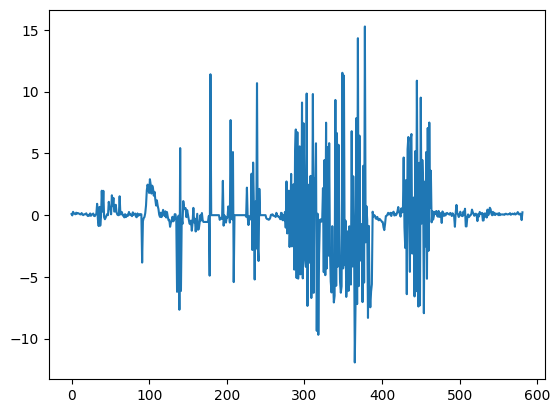

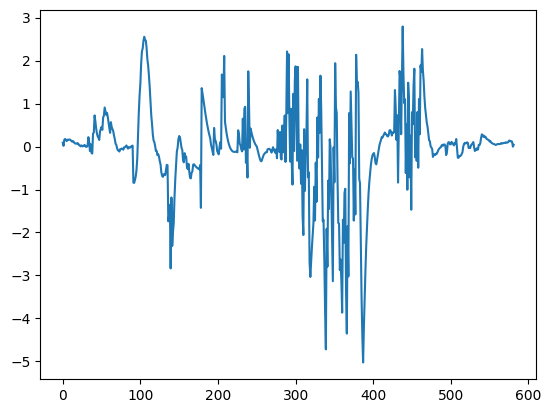

In [13]:
import matplotlib.pyplot as plt
def net_acceleration(df):
    df['net_acc'] = np.sqrt(df['acc_x']**2 + df['acc_y']**2 + df['acc_z']**2)
    return df
df=net_acceleration(df)
df_kalman=net_acceleration(df_kalman)
plt.plot(df['acc_z'])
plt.show()
plt.plot(df_kalman['acc_z'])

plt.show()

In [14]:
def apply_moving_average(df, column_name, window_size=5):
    df_filtered = df.copy()
    df_filtered[column_name] = df[column_name].rolling(window=window_size).mean()
    return df_filtered
df_y=apply_moving_average(df_kalman,'acc_z',1)

,time,acc_x,acc_y,acc_z,net_acc
0,2024-06-25T23:28:04.052030,-0.010000,0.000000,0.090000,0.090554
1,2024-06-25T23:28:04.411415,-0.016669,0.040013,0.016642,0.046431
2,2024-06-25T23:28:04.711078,-0.026256,-0.027554,0.161363,0.165791
3,2024-06-25T23:28:05.012022,-0.047844,-0.091933,0.176248,0.204460
4,2024-06-25T23:28:05.312488,-0.059395,-0.080983,0.157133,0.186485


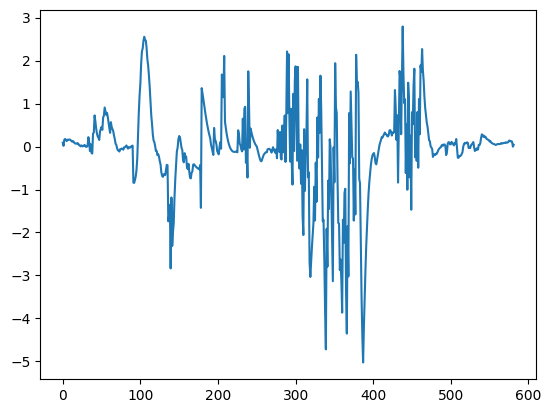

In [15]:
plt.plot(df_kalman['acc_z'])
df_kalman.dropna(inplace=True)
df_kalman.head()

[140 179 205 208 239 289 291 294 297 299 303 311 315 328 330 332 340 342
 344 349 351 361 367 369 371 378 434 438 443 445 450 457 459 461]


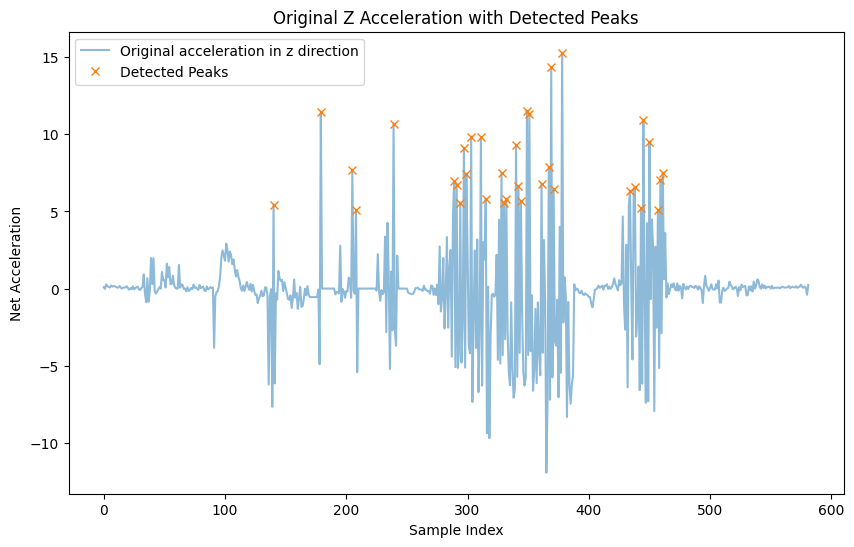

In [16]:
from scipy.signal import find_peaks,detrend
peak_height=5
peak_distance=None

def detect_peaks(df, column_name='net_acc', height=10, distance=None):
 
    peaks, _ = find_peaks(df[column_name].dropna(), height=height, distance=distance)
    return peaks
peaks = detect_peaks(df, column_name='acc_z', height=peak_height, distance=peak_distance)
print(peaks)

def plot_peaks(df,df_kalman,peaks):
    plt.figure(figsize=(10, 6))
    plt.plot( df['acc_z'], label='Original acceleration in z direction', alpha=0.5)
    # plt.plot( df_kalman['acc_z'], label='Filtered net_acc(Kalman_Filter)', color='red')
    plt.plot( df['acc_z'].iloc[peaks], "x", label='Detected Peaks')
    plt.xlabel('Sample Index')
    plt.ylabel('Net Acceleration')
    plt.title('Original Z Acceleration with Detected Peaks')
    plt.legend()
    plt.show()
plot_peaks(df,df_kalman,peaks)

df_kalman.head()
df_kalman.dropna(inplace=True)



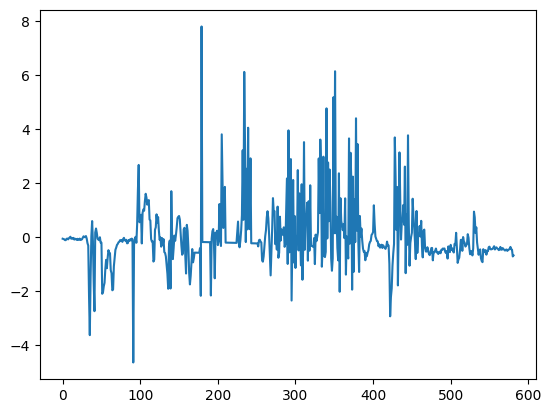

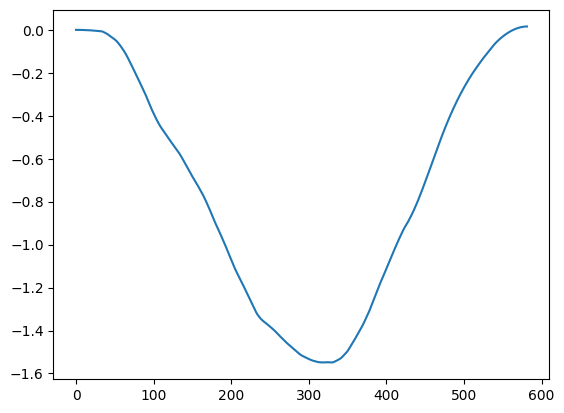

,Timestamp,acc_x,acc_y,acc_z,GyroX,GyroY,GyroZ,net_acc,v_x,v_y,v_z,x_pos,y_pos,z_pos,v_net,x_net
577,2024-06-25T23:34:23.847534,-0.365622,0.018567,0.218031,1.811,0.62,-7.315920,0.250998,0.024553,-0.001904,-0.006488,0.014736,-0.011554,0.002271,0.025467,0.018863
578,2024-06-25T23:34:24.148287,-0.456355,-0.101904,0.298415,1.810,0.62,-7.377592,0.165227,0.019989,-0.002923,-0.003503,0.015159,-0.011578,0.002221,0.020504,0.019203
579,2024-06-25T23:34:24.447702,-0.467089,-0.172376,0.218799,1.811,0.62,-7.444920,0.059161,0.015319,-0.004646,-0.001315,0.015488,-0.011616,0.002197,0.016062,0.019485
580,2024-06-25T23:34:24.748319,-0.717822,0.317153,-0.230816,1.100,0.69,-7.444920,0.698570,0.008140,-0.001475,-0.003624,0.015687,-0.011646,0.002172,0.009032,0.019658
581,2024-06-25T23:34:25.765066,-0.678556,-0.053319,0.399568,1.810,0.56,-7.066620,0.339706,0.001355,-0.002008,0.000372,0.015748,-0.011664,0.002156,0.002451,0.019715


In [17]:
def calculate_positions_and_velocity(df, delta_t=0.01, acc_min_threshold=-2, acc_max_threshold=2, cutoff_freq=0.1, sampling_freq=10):
    df = df.copy()
    df['v_x'] = 0.0
    df['v_y'] = 0.0
    df['v_z'] = 0.0
    df['x_pos'] = 0.0
    df['y_pos'] = 0.0
    df['z_pos'] = 0.0
    df['acc_x'] = detrend(df['acc_x'])
    df['acc_y'] = detrend(df['acc_y'])
    df['acc_z'] = detrend(df['acc_z'])
    
    
    for i in range(2, len(df)):
        acc_x = df.loc[i, 'acc_x']
        acc_y = df.loc[i, 'acc_y']
        acc_z = df.loc[i, 'acc_z']
        
        # Apply thresholding to filter out noise
        # if acc_min_threshold < acc_x < acc_max_threshold:
        #     acc_x = 0.0
        # if acc_min_threshold < acc_y < acc_max_threshold:
        #     acc_y = 0.0
        # if acc_min_threshold < acc_z < acc_max_threshold:
        #     acc_z = 0.0
        
        # Update velocities
        df.loc[i, 'v_x'] = df.loc[i-1, 'v_x'] + acc_x * delta_t
        df.loc[i, 'v_y'] = df.loc[i-1, 'v_y'] + acc_y * delta_t
        df.loc[i, 'v_z'] = df.loc[i-1, 'v_z'] + acc_z * delta_t
        
        # if i % 100 == 0:  # Adjusting every 100 steps, can be tuned
        #     df.loc[i, 'v_x'] -= np.mean(df.loc[:i, 'v_x'])
        #     df.loc[i, 'v_y'] -= np.mean(df.loc[:i, 'v_y'])
        #     df.loc[i, 'v_z'] -= np.mean(df.loc[:i, 'v_z'])
        
        # Update positions
        df.loc[i, 'x_pos'] = df.loc[i-1, 'x_pos'] + (df.loc[i-1, 'v_x']+df.loc[i,'v_x'] ) * delta_t + 0.5 * acc_x * (delta_t ** 2)
        df.loc[i, 'y_pos'] = df.loc[i-1, 'y_pos'] + df.loc[i-1, 'v_y'] * delta_t + 0.5 * acc_y * (delta_t ** 2)
        df.loc[i, 'z_pos'] = df.loc[i-1, 'z_pos'] + df.loc[i-1, 'v_z'] * delta_t + 0.5 * acc_z * (delta_t ** 2)
    
    df['v_net'] = np.sqrt(df['v_x']**2 + df['v_y']**2 + df['v_z']**2)
    df['x_net'] = np.sqrt(df['x_pos']**2 +df['y_pos']**2+ df['z_pos']**2) 
    
    return df

df_vel_disp=calculate_positions_and_velocity(df)

plt.plot(df_vel_disp['acc_x'])
plt.show()
plt.plot(df_vel_disp['x_pos'])
plt.show()
df_vel_disp.tail()


In [18]:
drum_boundaries = {
    'hihats': {'x_min': -1, 'y_min': -1, 'x_max': 0, 'y_max': 0},
    'crash': {'x_min': 0, 'y_min': 0, 'x_max': 1, 'y_max': 1},
    'hitoms': {'x_min': -1, 'y_min': 0, 'x_max': 0, 'y_max': 0},
    'lotoms': {'x_min': 0, 'y_min': 0, 'x_max': 1, 'y_max': 1},
    'ride': {'x_min': -2, 'y_min': -1, 'x_max': -1, 'y_max': 0},
    'snare': {'x_min': -2, 'y_min': 0, 'x_max': -1, 'y_max': 1}
}
df_y.head()
# Z threshold
z_threshold = -5

def find_drum_type(df, peak):
    
    detected_drum=None

    x_pos = df.loc[peak, 'x_pos']
    y_pos = df.loc[peak, 'y_pos']
    z_pos = df.loc[peak, 'z_pos']
        
    if z_pos > z_threshold:
            
        for drum, bounds in drum_boundaries.items():
            if (bounds['x_min'] <= x_pos <= bounds['x_max'] and 
                bounds['y_min'] <= y_pos <= bounds['y_max']):
                detected_drum = drum
                
                return detected_drum
            
           
    
    return detected_drum

for peak in peaks:
    print(find_drum_type(df_vel_disp,peak))
print(peaks)

hihats
hihats
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
ride
hihats
hihats
hihats
hihats
hihats
hihats
hihats
hihats
[140 179 205 208 239 289 291 294 297 299 303 311 315 328 330 332 340 342
 344 349 351 361 367 369 371 378 434 438 443 445 450 457 459 461]


In [19]:
import pygame
import os
import threading
def play_drum_sound(drum_type, sound_level):
    base_path = "samples\\%s" %(drum_type)  #path of the folder which contains the audio file
    file_name = f"{drum_type}{sound_level}.wav"   #the name of the audio file
    file_path = os.path.join(base_path, file_name)
    print(file_path)
    if os.path.exists(file_path):  #check if the file exists
        pygame.mixer.init()
        sound=pygame.mixer.Sound(file_path)
        sound.play()
    else:
        print("File not found")
        
#making a function which uses multithreading to run multiple audio files together    
def play_sound_thread(drum_type, sound_level):  
    sound_thread = threading.Thread(target=play_drum_sound, args=(drum_type, sound_level))
    sound_thread.start()

print(peaks)

[140 179 205 208 239 289 291 294 297 299 303 311 315 328 330 332 340 342
 344 349 351 361 367 369 371 378 434 438 443 445 450 457 459 461]


In [20]:
def find_drum_sound_level(df,peak):
    lvl1=5
    lvl2=8
    lvl3=11
    lvl4=13.5
    lvl5=14
    lvl6=16.5
    lvl7=17
    lvl8=18.5
    lvl9=20
    
    acceleration_Value=abs(df.loc[peak, 'acc_z'])
    print(acceleration_Value)
    
    if lvl1 <=acceleration_Value<lvl2:
        return 7
    if lvl2 <=acceleration_Value<lvl3:
        return 1
    if lvl3 <=acceleration_Value<lvl4:
        return 2
    if lvl4 <=acceleration_Value<lvl5:
        return 3
    if lvl5 <=acceleration_Value<lvl6:
        return 4
    if lvl6 <=acceleration_Value<lvl7:
        return 5
    if lvl7 <=acceleration_Value<lvl8:
        return 6
    if lvl8 <=acceleration_Value<lvl9:
        return 7
            
print(peaks)


[140 179 205 208 239 289 291 294 297 299 303 311 315 328 330 332 340 342
 344 349 351 361 367 369 371 378 434 438 443 445 450 457 459 461]


In [21]:
# print(peaks)
import time
def give_drumtype_and_level(df,peaks):
    pygame.init()
    pygame.mixer.init()
    for peak in peaks:
        
        drum_type=find_drum_type(df,peak)
        sound_level=find_drum_sound_level(df,peak)
        print(peak,drum_type,sound_level)
        play_sound_thread(drum_type,sound_level)


